In [0]:
import numpy as np


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
CUDA = True
BATCH_SIZE = 100

In [0]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_tensors = 2*(train_tensors-0.5)
test_tensors = 2*(test_tensors-0.5)


train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [368]:
# [CHANGED] Add dropout layer to introduce diversity in gradients
# [CHANGED] [Important] Use LeakyReLU since it keeps gradients better

channel_0=16
channel_1=32
channel_2=64
channel_3=128

discriminator = nn.Sequential(
    
    #1,32,32
    
    #
    
    nn.Dropout(0.3),
    nn.Conv2d(in_channels=1, out_channels=channel_0, kernel_size=4, stride=2, padding=3, dilation=1, groups=1, bias=True, padding_mode='zeros'),
    nn.LeakyReLU(0.2),
    
    # channel_0,16,16
    
    
    ##
    nn.Conv2d(in_channels=channel_0, out_channels=channel_1, kernel_size=4, stride=2, padding=1, dilation=1, groups=1, bias=True, padding_mode='zeros'),
    nn.BatchNorm2d(num_features=channel_1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.LeakyReLU(0.2),
         
    #channel_1,8,8
                
                   
    ###
    nn.Conv2d(in_channels=channel_1, out_channels=channel_2, kernel_size=4, stride=2, padding=1, dilation=1, groups=1, bias=True, padding_mode='zeros'),
    nn.BatchNorm2d(num_features=channel_2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.LeakyReLU(0.2),
    
    #channel_2,4,4
                   
 
     ####
    nn.Conv2d(in_channels=channel_2, out_channels=channel_3, kernel_size=4, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros'),
    nn.BatchNorm2d(num_features=channel_3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.LeakyReLU(0.2),
    
    #channel_3,1,1
    
    
     
    
     nn.Conv2d(in_channels=channel_3, out_channels=1, kernel_size=1, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros'),
     nn.Sigmoid()
    

    
    
    
#     nn.Conv2d(in_channels=channel_2, out_channels=1, kernel_size=4, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros'),
#      nn.Sigmoid()
                  
                    
)
vorodi = torch.randn(10,1,28,28)
print(discriminator(vorodi).shape)
       
                   

torch.Size([10, 1, 1, 1])


In [369]:
# [CHANGED] [Important] Use LeakyReLU since it keeps noise better
channel_0=16
channel_1=32
channel_2=64
channel_3=128


generator = nn.Sequential(
    
    #128,1,1
    
    ####
    
    #nn.Dropout(),
    nn.ConvTranspose2d(in_channels=channel_3, out_channels=channel_2, kernel_size=4, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros'),
    
# #     #64,4,4
    
    ###
    nn.ConvTranspose2d(in_channels=channel_2, out_channels=channel_1, kernel_size=4, stride=2, padding=1, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros'),
    nn.BatchNorm2d(num_features=channel_1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.LeakyReLU(0.2),
    
# # #     #32,8,8
    
    ## 
    nn.ConvTranspose2d(in_channels=channel_1, out_channels=channel_0, kernel_size=4, stride=2, padding=1, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros'),
    nn.BatchNorm2d(num_features=channel_0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
    nn.LeakyReLU(0.2),
   
# #     #16,16,16
    
    #
    nn.ConvTranspose2d(in_channels=channel_0, out_channels=1, kernel_size=4, stride=2, padding=3, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros'),
    nn.Tanh(),
    
    
    
    
 
    
    
    
)

vorodi = torch.randn(10,128,1,1)
print(generator(vorodi).shape)
       

torch.Size([10, 1, 28, 28])


In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002


opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 1, 1, 1])) is deprecated. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 1, 1, 1])) is deprecated. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 1, 1, 1])) is deprecated. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 1, 1, 1])) is deprecated. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel

epoch: 0 	 last batch loss D: 1.3529642820358276 	 last batch loss G: 0.9746330976486206


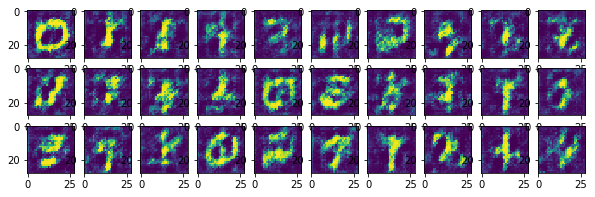

epoch: 1 	 last batch loss D: 0.7491620182991028 	 last batch loss G: 1.0236961841583252


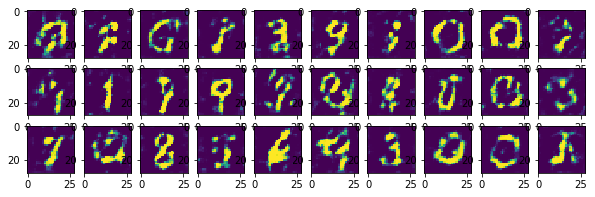

epoch: 2 	 last batch loss D: 0.8434619903564453 	 last batch loss G: 1.3144540786743164


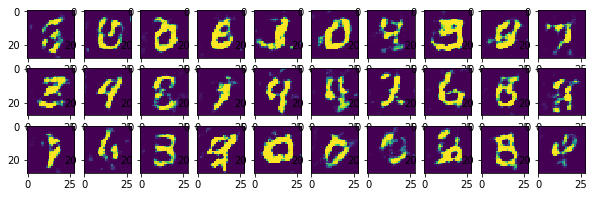

epoch: 3 	 last batch loss D: 0.9952025413513184 	 last batch loss G: 1.4751986265182495


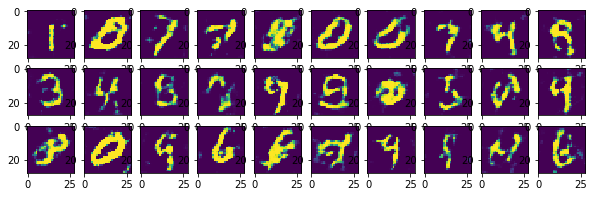

epoch: 4 	 last batch loss D: 0.7314085960388184 	 last batch loss G: 2.139403820037842


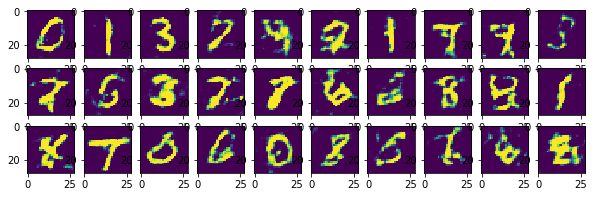

epoch: 5 	 last batch loss D: 0.4677508473396301 	 last batch loss G: 0.7825413942337036


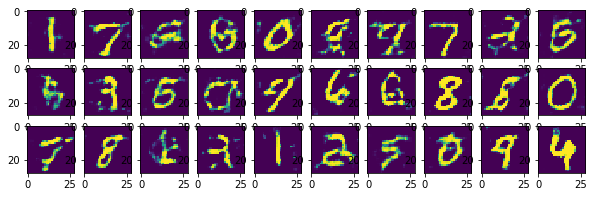

epoch: 6 	 last batch loss D: 0.7415460348129272 	 last batch loss G: 2.2062816619873047


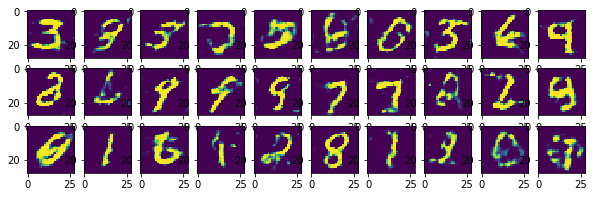

epoch: 7 	 last batch loss D: 0.5697941184043884 	 last batch loss G: 2.997525691986084


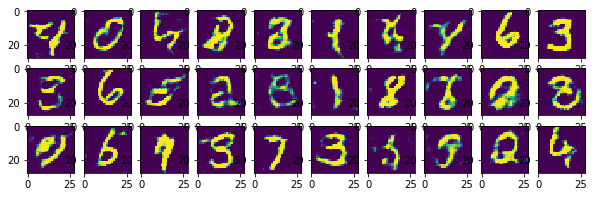

epoch: 8 	 last batch loss D: 0.3075651526451111 	 last batch loss G: 1.7700700759887695


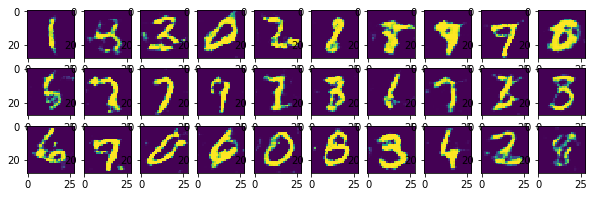

epoch: 9 	 last batch loss D: 0.2465793788433075 	 last batch loss G: 2.6758480072021484


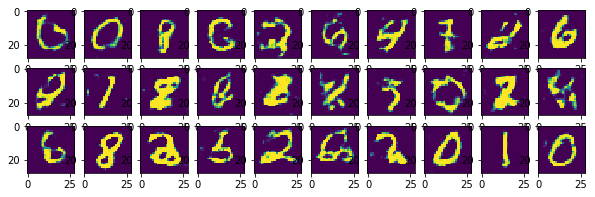

epoch: 10 	 last batch loss D: 0.5794028043746948 	 last batch loss G: 3.200343608856201


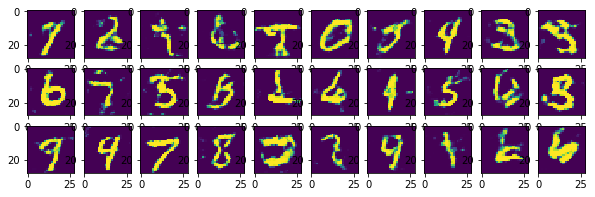

epoch: 11 	 last batch loss D: 0.40032872557640076 	 last batch loss G: 2.369717836380005


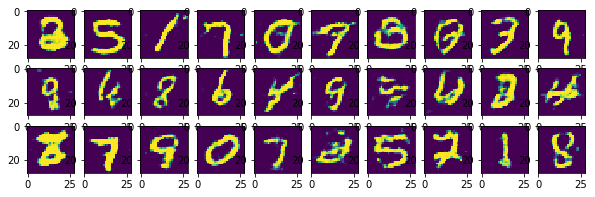

epoch: 12 	 last batch loss D: 0.5265189409255981 	 last batch loss G: 4.139225482940674


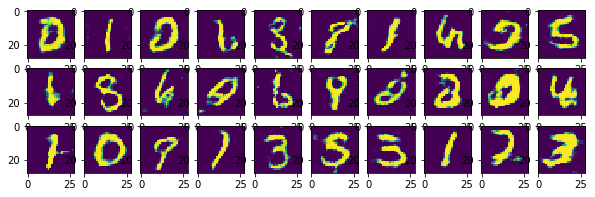

epoch: 13 	 last batch loss D: 0.49260252714157104 	 last batch loss G: 4.229692459106445


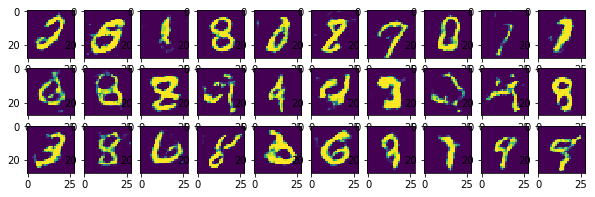

epoch: 14 	 last batch loss D: 0.49010688066482544 	 last batch loss G: 3.019303321838379


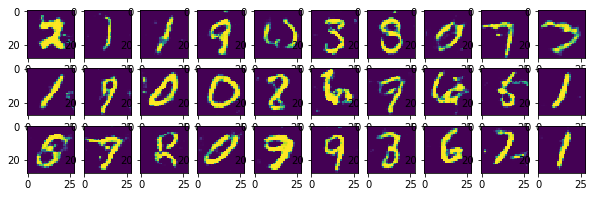

epoch: 15 	 last batch loss D: 0.798195481300354 	 last batch loss G: 5.11130428314209


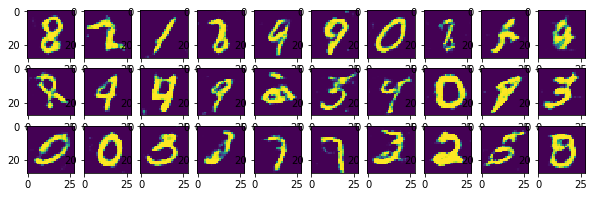

epoch: 16 	 last batch loss D: 0.07393412292003632 	 last batch loss G: 2.138460636138916


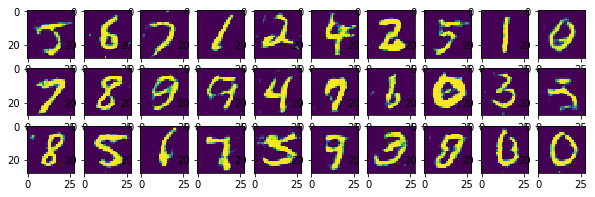

epoch: 17 	 last batch loss D: 0.2963204085826874 	 last batch loss G: 1.9493941068649292


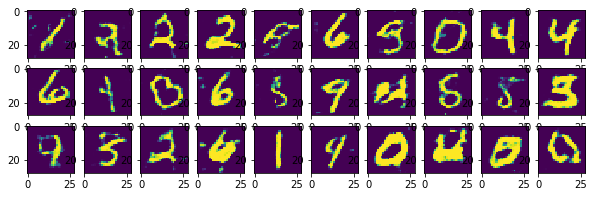

epoch: 18 	 last batch loss D: 0.0966988205909729 	 last batch loss G: 2.2112975120544434


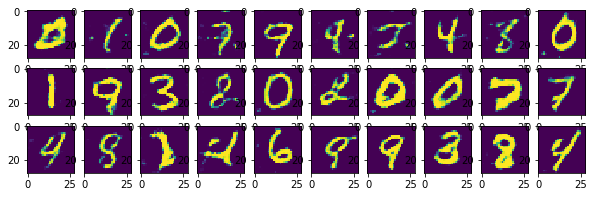

epoch: 19 	 last batch loss D: 0.1522907167673111 	 last batch loss G: 3.903909206390381


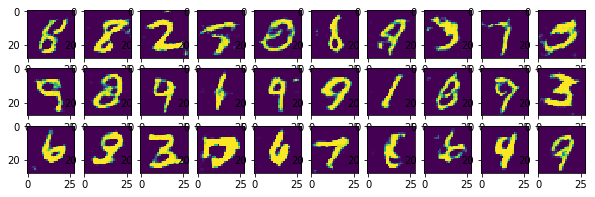

epoch: 20 	 last batch loss D: 0.1534430980682373 	 last batch loss G: 2.514747142791748


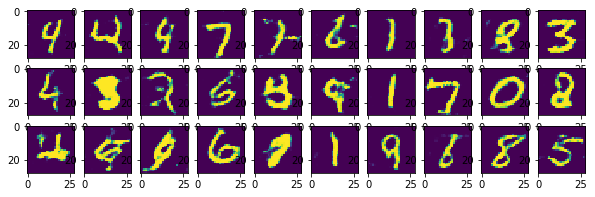

epoch: 21 	 last batch loss D: 1.3235137462615967 	 last batch loss G: 2.782435417175293


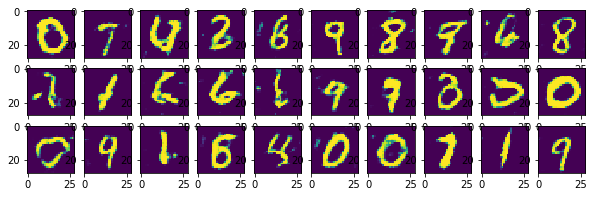

epoch: 22 	 last batch loss D: 0.11562588065862656 	 last batch loss G: 2.668201446533203


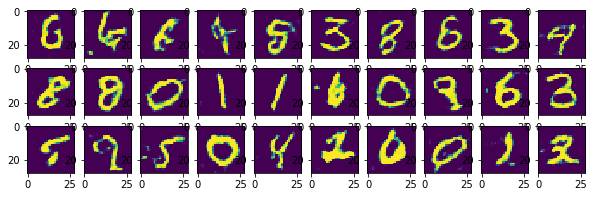

epoch: 23 	 last batch loss D: 0.29304587841033936 	 last batch loss G: 3.7178382873535156


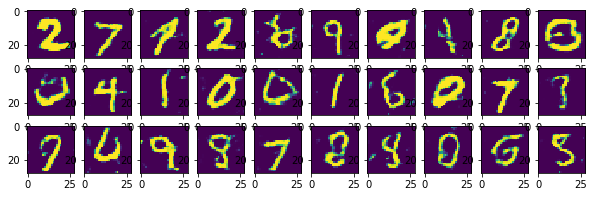

epoch: 24 	 last batch loss D: 0.37967273592948914 	 last batch loss G: 3.9114859104156494


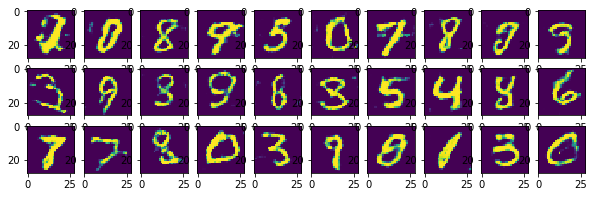

epoch: 25 	 last batch loss D: 0.0657477155327797 	 last batch loss G: 2.9670443534851074


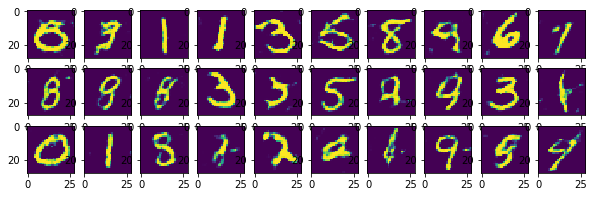

epoch: 26 	 last batch loss D: 0.0591411367058754 	 last batch loss G: 3.1819772720336914


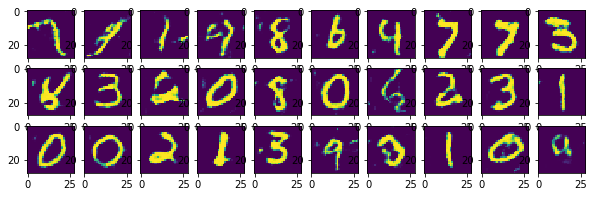

epoch: 27 	 last batch loss D: 0.3650575876235962 	 last batch loss G: 2.3011832237243652


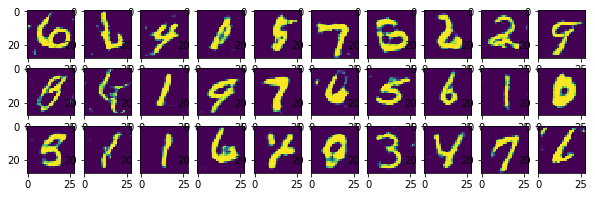

epoch: 28 	 last batch loss D: 0.029946869239211082 	 last batch loss G: 5.82573127746582


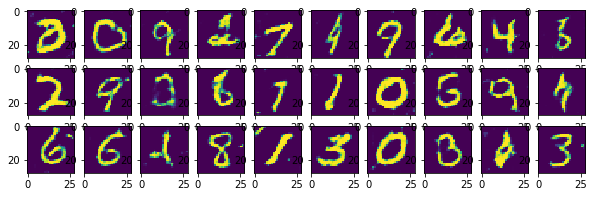

epoch: 29 	 last batch loss D: 0.044518981128931046 	 last batch loss G: 3.588784694671631


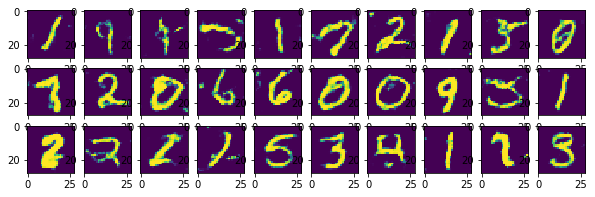

epoch: 30 	 last batch loss D: 0.03548971936106682 	 last batch loss G: 2.7733254432678223


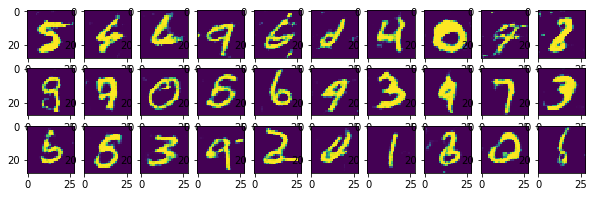

epoch: 31 	 last batch loss D: 0.16276928782463074 	 last batch loss G: 1.0929172039031982


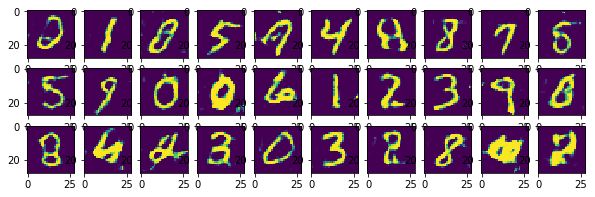

epoch: 32 	 last batch loss D: 0.04473138228058815 	 last batch loss G: 5.719632148742676


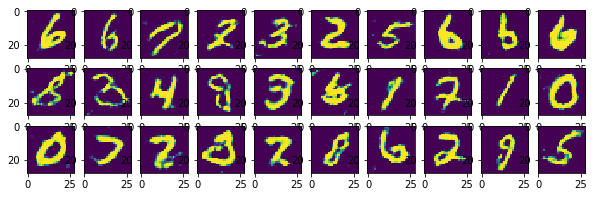

epoch: 33 	 last batch loss D: 0.07485778629779816 	 last batch loss G: 5.088468074798584


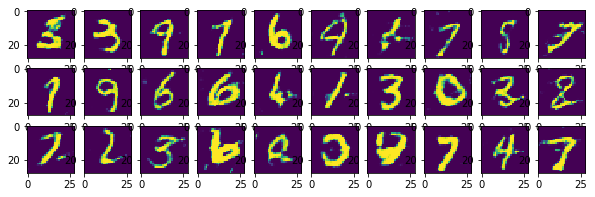

epoch: 34 	 last batch loss D: 0.04892876371741295 	 last batch loss G: 4.7223711013793945


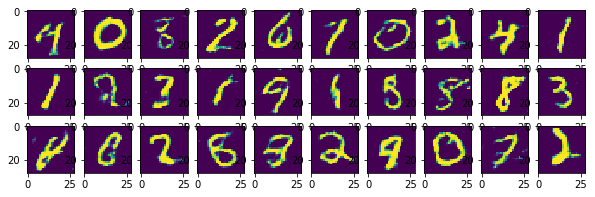

epoch: 35 	 last batch loss D: 0.2822866141796112 	 last batch loss G: 4.854214668273926


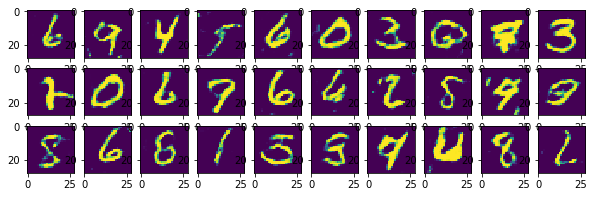

epoch: 36 	 last batch loss D: 0.11712384223937988 	 last batch loss G: 3.1847076416015625


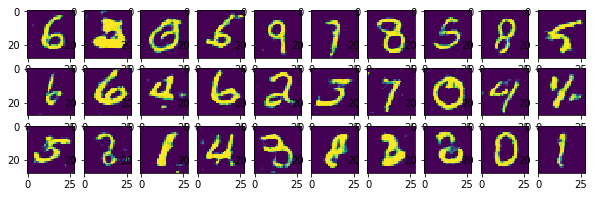

epoch: 37 	 last batch loss D: 0.034273117780685425 	 last batch loss G: 4.764138221740723


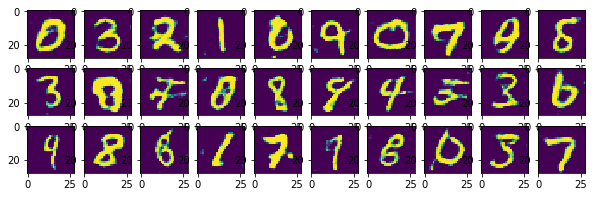

epoch: 38 	 last batch loss D: 0.03079039603471756 	 last batch loss G: 3.168802261352539


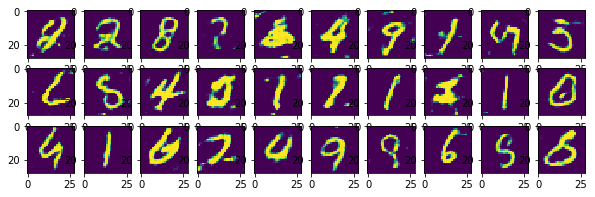

epoch: 39 	 last batch loss D: 0.9068190455436707 	 last batch loss G: 3.1912336349487305


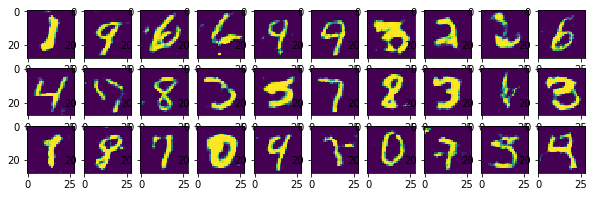

epoch: 40 	 last batch loss D: 0.10473476350307465 	 last batch loss G: 6.668727397918701


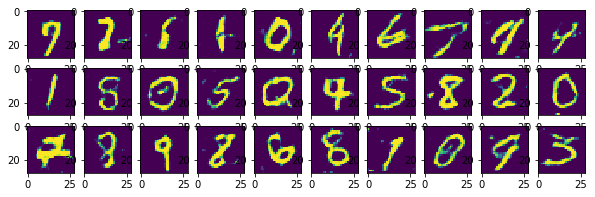

epoch: 41 	 last batch loss D: 0.1782054901123047 	 last batch loss G: 6.2648749351501465


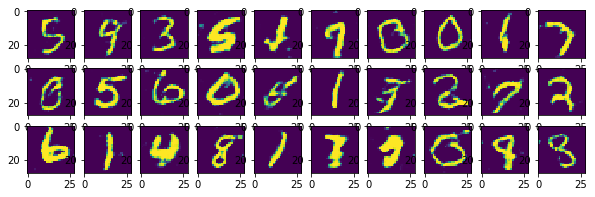

epoch: 42 	 last batch loss D: 0.15646469593048096 	 last batch loss G: 6.551346778869629


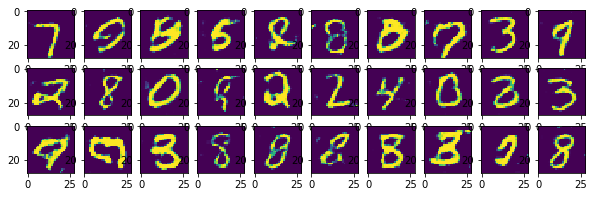

epoch: 43 	 last batch loss D: 0.6812341809272766 	 last batch loss G: 3.2217400074005127


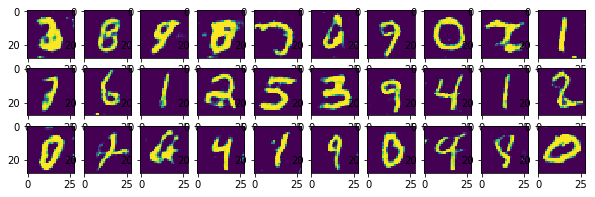

epoch: 44 	 last batch loss D: 0.4748016595840454 	 last batch loss G: 6.187764644622803


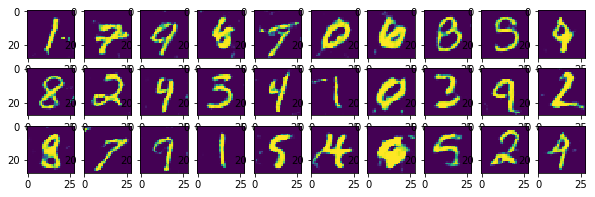

epoch: 45 	 last batch loss D: 0.2349783480167389 	 last batch loss G: 2.997925281524658


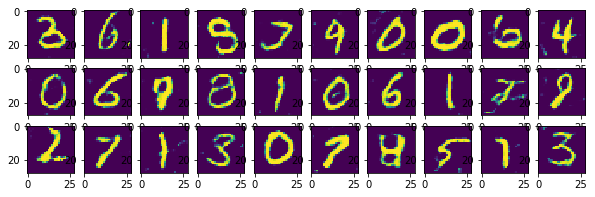

epoch: 46 	 last batch loss D: 0.02628229558467865 	 last batch loss G: 3.3939754962921143


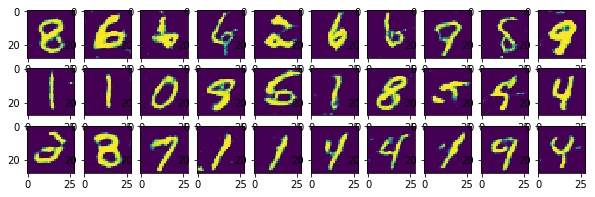

epoch: 47 	 last batch loss D: 0.11470790207386017 	 last batch loss G: 4.7989397048950195


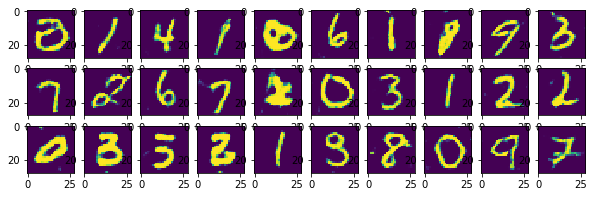

epoch: 48 	 last batch loss D: 0.0456869937479496 	 last batch loss G: 5.041872501373291


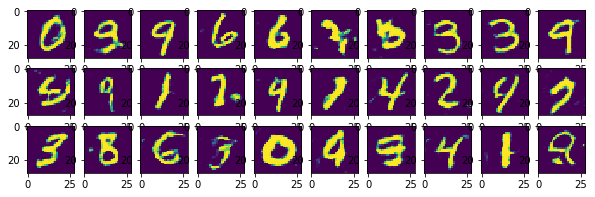

epoch: 49 	 last batch loss D: 0.0688711628317833 	 last batch loss G: 6.656131267547607


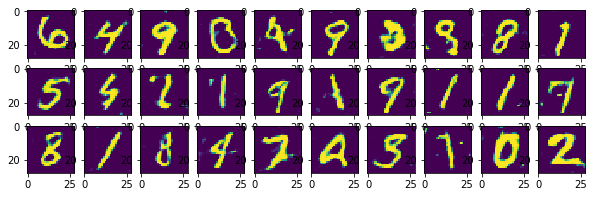

epoch: 50 	 last batch loss D: 0.1984940618276596 	 last batch loss G: 6.131821632385254


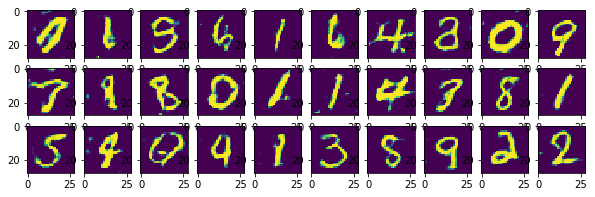

epoch: 51 	 last batch loss D: 0.16148564219474792 	 last batch loss G: 5.006749153137207


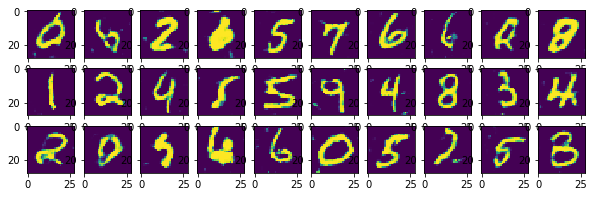

epoch: 52 	 last batch loss D: 0.3453434109687805 	 last batch loss G: 6.727487087249756


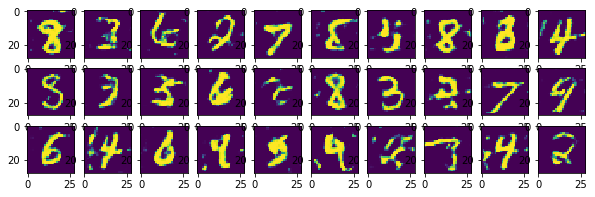

epoch: 53 	 last batch loss D: 0.112197645008564 	 last batch loss G: 3.969059467315674


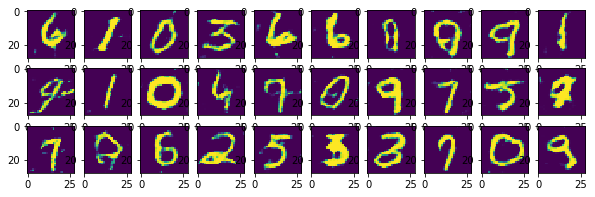

epoch: 54 	 last batch loss D: 0.29085761308670044 	 last batch loss G: 4.141486167907715


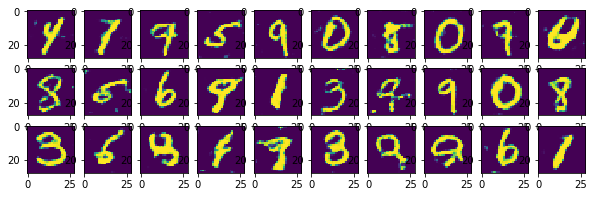

epoch: 55 	 last batch loss D: 0.009484932757914066 	 last batch loss G: 1.6342473030090332


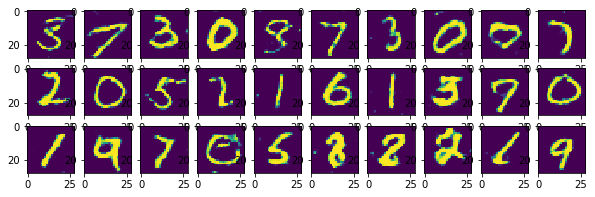

epoch: 56 	 last batch loss D: 0.6882643103599548 	 last batch loss G: 2.4362058639526367


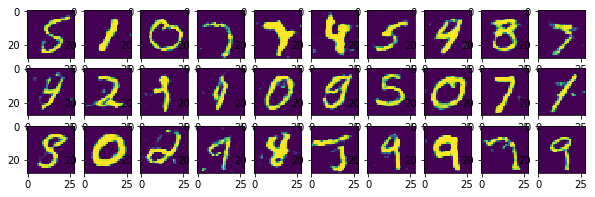

epoch: 57 	 last batch loss D: 0.5423130393028259 	 last batch loss G: 3.0403788089752197


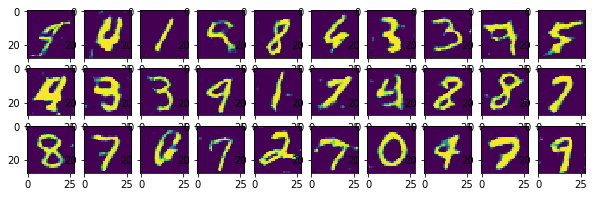

epoch: 58 	 last batch loss D: 0.016603562980890274 	 last batch loss G: 7.42041540145874


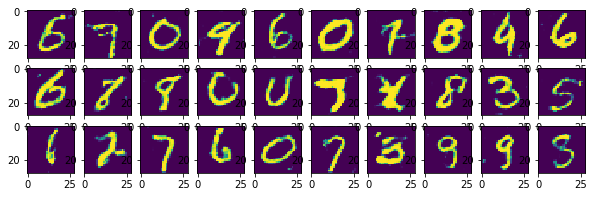

epoch: 59 	 last batch loss D: 0.021467939019203186 	 last batch loss G: 6.3018317222595215


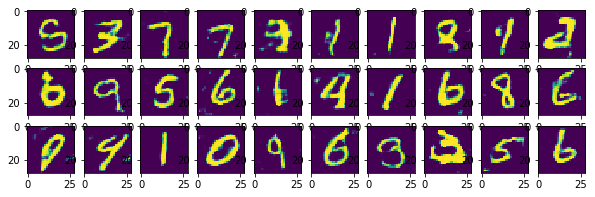

epoch: 60 	 last batch loss D: 0.04002464562654495 	 last batch loss G: 7.6305036544799805


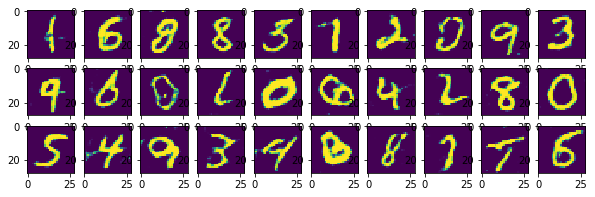

epoch: 61 	 last batch loss D: 0.15934917330741882 	 last batch loss G: 4.681903839111328


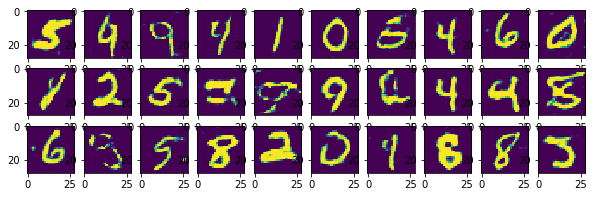

epoch: 62 	 last batch loss D: 1.7541900873184204 	 last batch loss G: 7.994626045227051


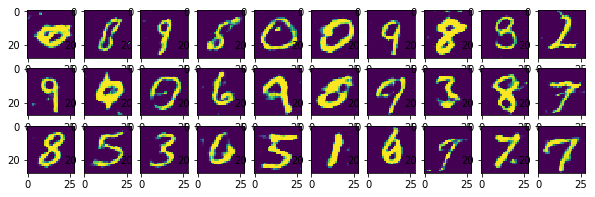

epoch: 63 	 last batch loss D: 0.3377533257007599 	 last batch loss G: 7.296777248382568


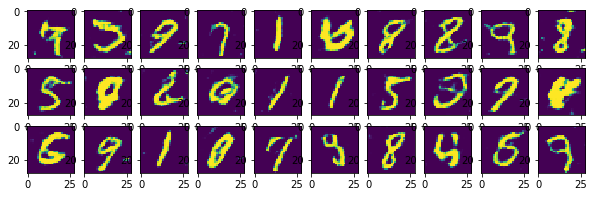

epoch: 64 	 last batch loss D: 0.06683091819286346 	 last batch loss G: 5.623103618621826


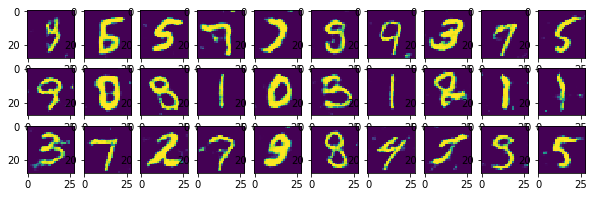

epoch: 65 	 last batch loss D: 0.3702719509601593 	 last batch loss G: 7.518887519836426


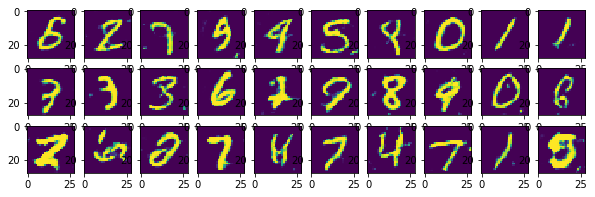

epoch: 66 	 last batch loss D: 0.0349724218249321 	 last batch loss G: 4.6801252365112305


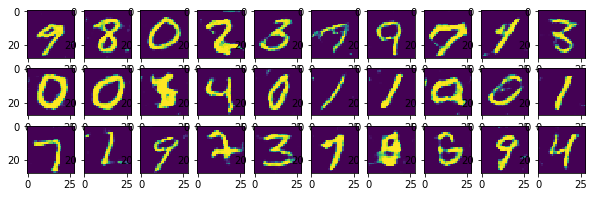

epoch: 67 	 last batch loss D: 0.060048554092645645 	 last batch loss G: 4.947624206542969


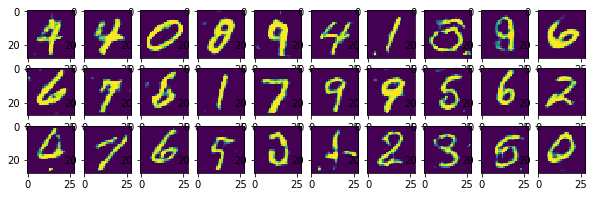

epoch: 68 	 last batch loss D: 0.06739984452724457 	 last batch loss G: 8.827486991882324


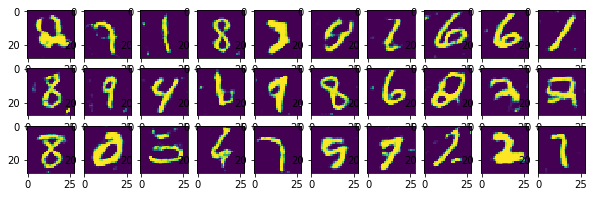

epoch: 69 	 last batch loss D: 0.03346385061740875 	 last batch loss G: 9.575328826904297


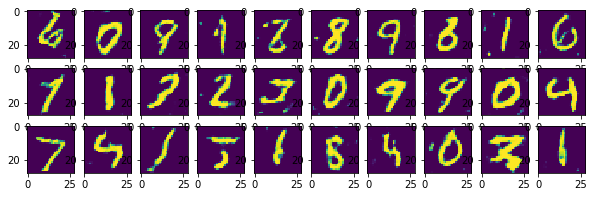

epoch: 70 	 last batch loss D: 0.18928758800029755 	 last batch loss G: 8.586719512939453


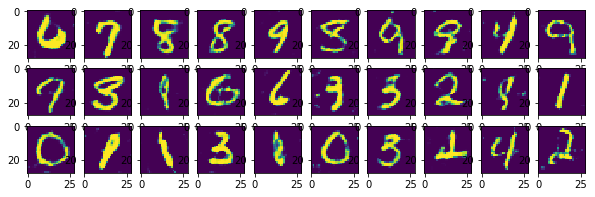

epoch: 71 	 last batch loss D: 0.03580475598573685 	 last batch loss G: 7.561802387237549


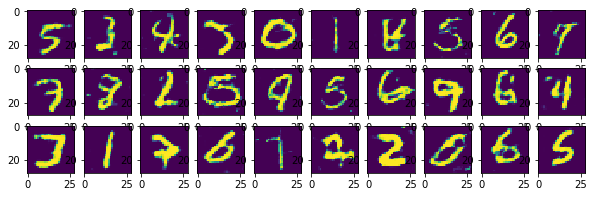

epoch: 72 	 last batch loss D: 0.11955896764993668 	 last batch loss G: 7.646254539489746


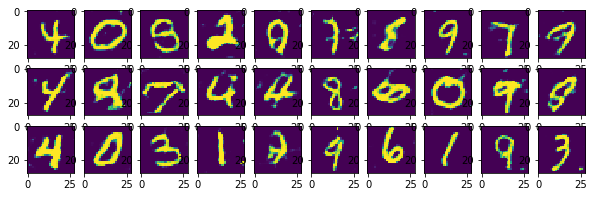

epoch: 73 	 last batch loss D: 0.04195093363523483 	 last batch loss G: 2.146843910217285


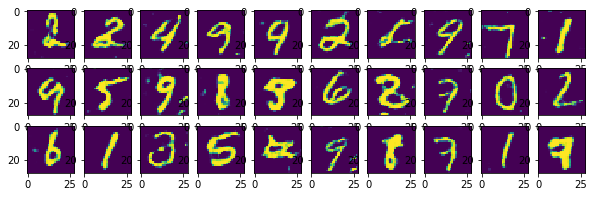

epoch: 74 	 last batch loss D: 0.1269964724779129 	 last batch loss G: 4.498373031616211


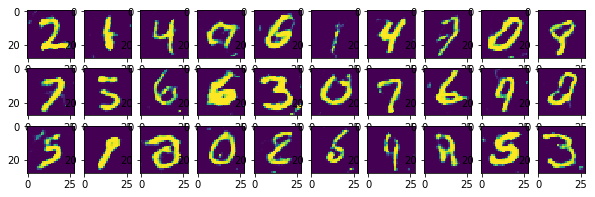

epoch: 75 	 last batch loss D: 0.04242728278040886 	 last batch loss G: 6.215027809143066


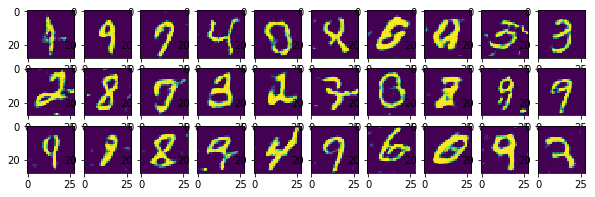

epoch: 76 	 last batch loss D: 0.03542220592498779 	 last batch loss G: 3.174121856689453


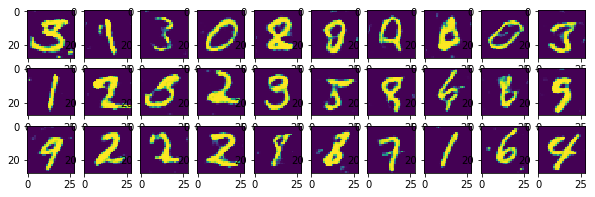

epoch: 77 	 last batch loss D: 0.2515283524990082 	 last batch loss G: 7.854459762573242


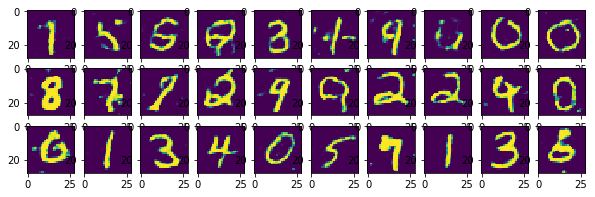

epoch: 78 	 last batch loss D: 0.16547051072120667 	 last batch loss G: 5.215443134307861


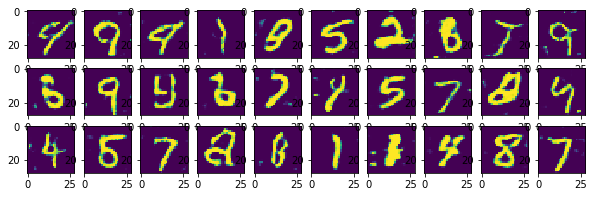

epoch: 79 	 last batch loss D: 0.4439277648925781 	 last batch loss G: 5.433350563049316


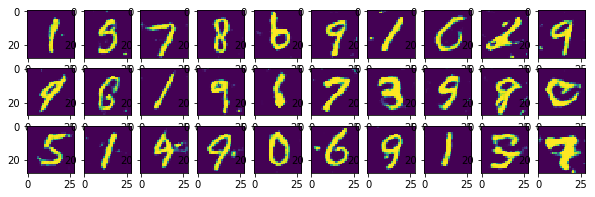

epoch: 80 	 last batch loss D: 0.03116537444293499 	 last batch loss G: 8.075667381286621


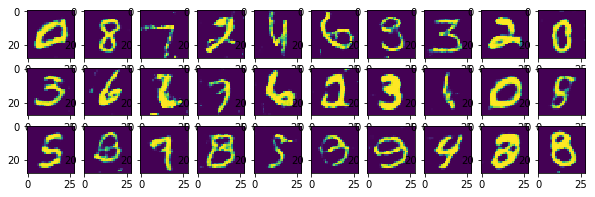

epoch: 81 	 last batch loss D: 0.11222226917743683 	 last batch loss G: 5.285079002380371


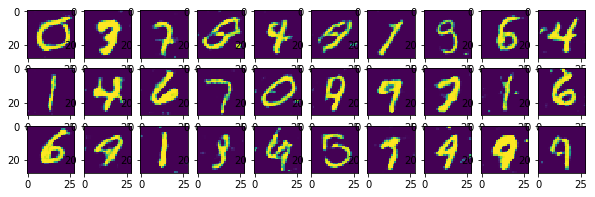

epoch: 82 	 last batch loss D: 0.6446521878242493 	 last batch loss G: 3.19439697265625


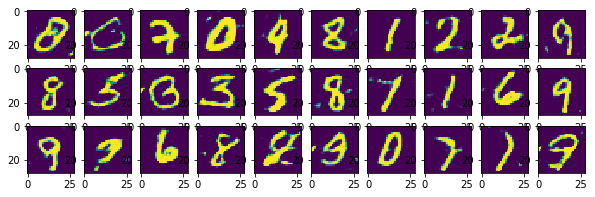

epoch: 83 	 last batch loss D: 0.00708036869764328 	 last batch loss G: 10.239167213439941


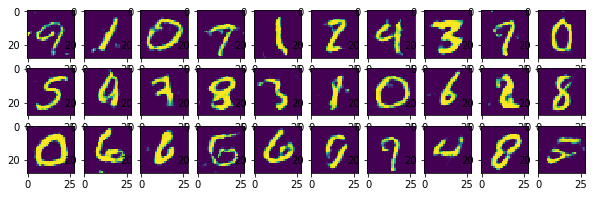

epoch: 84 	 last batch loss D: 0.03523629903793335 	 last batch loss G: 7.829746723175049


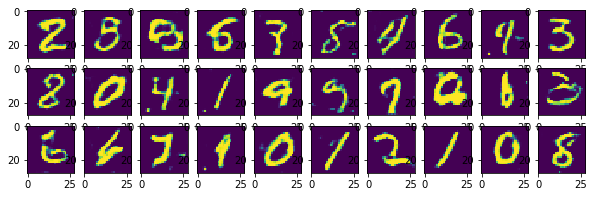

epoch: 85 	 last batch loss D: 0.7399099469184875 	 last batch loss G: 7.145884037017822


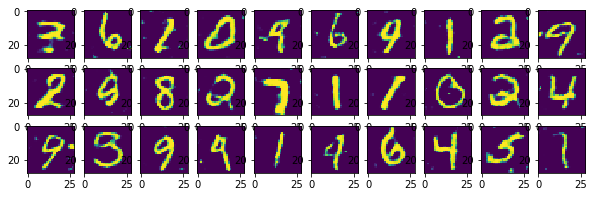

epoch: 86 	 last batch loss D: 0.32387077808380127 	 last batch loss G: 6.83490514755249


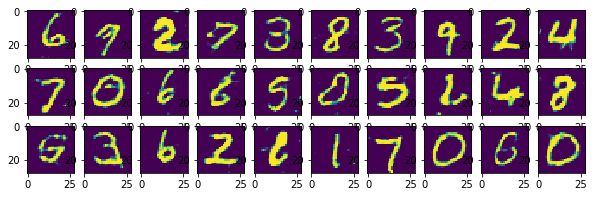

epoch: 87 	 last batch loss D: 0.6074679493904114 	 last batch loss G: 8.19876480102539


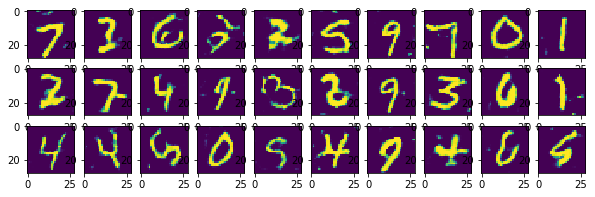

epoch: 88 	 last batch loss D: 0.07609310746192932 	 last batch loss G: 4.810152053833008


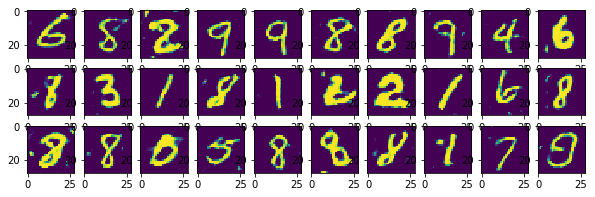

epoch: 89 	 last batch loss D: 0.15424853563308716 	 last batch loss G: 5.539399147033691


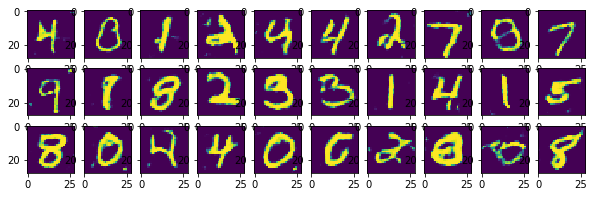

epoch: 90 	 last batch loss D: 1.4200990200042725 	 last batch loss G: 8.921638488769531


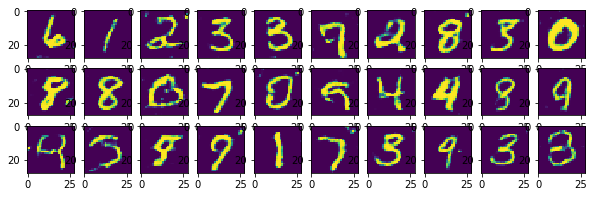

epoch: 91 	 last batch loss D: 0.010485549457371235 	 last batch loss G: 2.9424242973327637


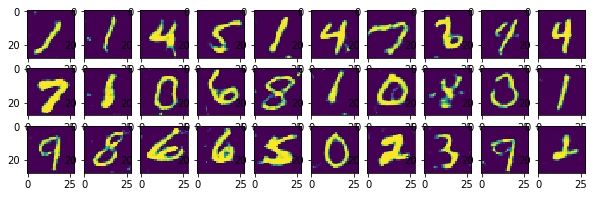

epoch: 92 	 last batch loss D: 0.038715340197086334 	 last batch loss G: 7.169808864593506


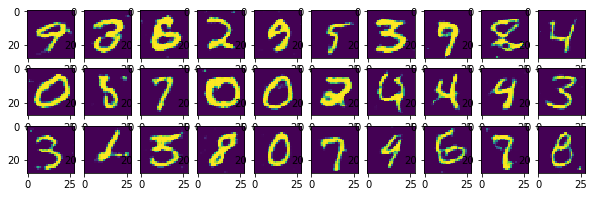

epoch: 93 	 last batch loss D: 0.052821896970272064 	 last batch loss G: 9.48120403289795


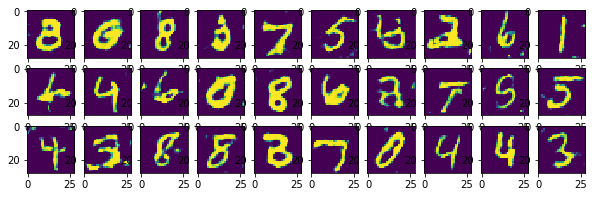

epoch: 94 	 last batch loss D: 0.02006574161350727 	 last batch loss G: 8.246822357177734


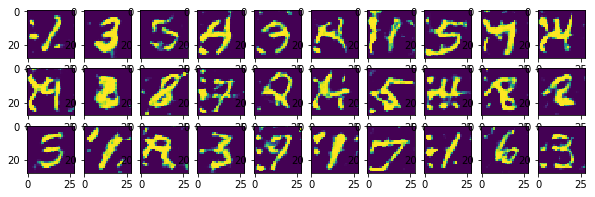

epoch: 95 	 last batch loss D: 0.02469182014465332 	 last batch loss G: 8.797304153442383


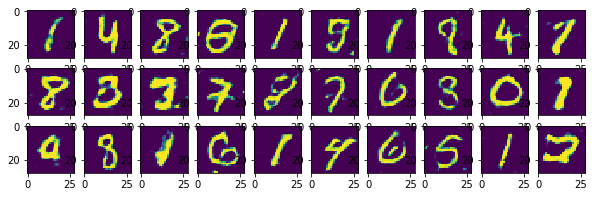

epoch: 96 	 last batch loss D: 0.36584317684173584 	 last batch loss G: 9.968104362487793


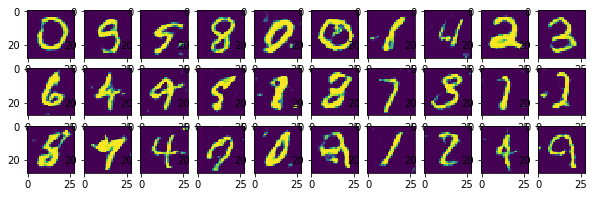

epoch: 97 	 last batch loss D: 0.22511261701583862 	 last batch loss G: 7.996627330780029


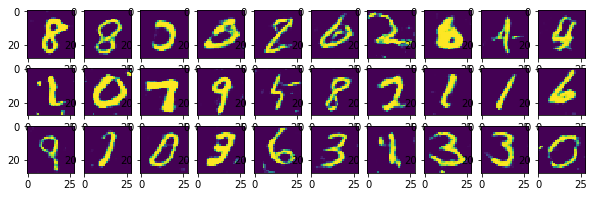

epoch: 98 	 last batch loss D: 0.2856886684894562 	 last batch loss G: 7.159507751464844


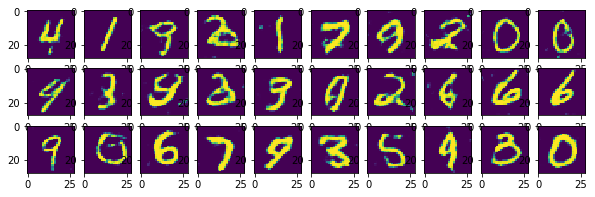

epoch: 99 	 last batch loss D: 0.2948535978794098 	 last batch loss G: 3.215184211730957


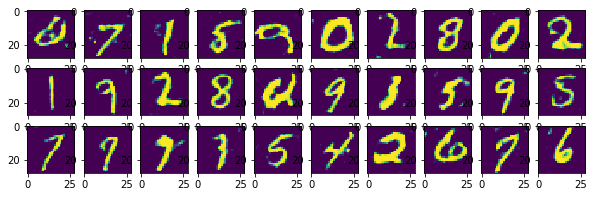

In [372]:
# [CHANGED] EPSILON is not needed anymore
# EPSILON = 1e-6

for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        

        real_img = img.view(img.shape[0],1,28,28)+0.05*torch.rand((img.shape[0],1,28,28))
        if CUDA:
            real_img = real_img.cuda()

        fake_labels = torch.zeros(img.shape[0], 1).cuda()
        real_labels = torch.ones(img.shape[0], 1).cuda()

        #########################
        z = torch.randn(img.shape[0],128,1,1)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        opt_D.zero_grad()
        # [CHANGED] BCE is more stable
        #         loss_d = -(torch.log(EPSILON + 1 - discriminator(fake_img.detach())) + 
        #                    torch.log(EPSILON + discriminator(real_img))).mean()
        loss_d = (F.binary_cross_entropy(discriminator(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(discriminator(real_img), real_labels))
        loss_d.backward()
        opt_D.step()
        #########################
        z = torch.randn(img.shape[0],128,1,1)
        if CUDA:
          z = z.cuda()
        fake_img = generator(z)

        opt_G.zero_grad()
        # [CHANGED] BCE is more stable
        #     loss_g = - torch.log(EPSILON + discriminator(fake_img)).mean()
        loss_g = F.binary_cross_entropy(discriminator(fake_img), real_labels)
        loss_g.backward()
        opt_G.step()
        #########################

    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))

    # [CHANGED] Better output
    for i in range(3):
        for j in range(10):
            plt.subplot(3, 10, i * 10 + j + 1)
            plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
    plt.show()
